In [109]:
# Logistic regression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
% matplotlib inline

In [110]:
# Data source is - https://www.kaggle.com/hesh97/titanicdataset-traincsv
titanic_data = pd.read_csv("Data\\Titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [111]:
print("# of passengers in original data:", len(titanic_data.index))

# of passengers in original data: 891


# Analyze Data

0 stands for # of Passengers Did not survive and 1 stands for # of Passengers who survived

In [112]:
# Glance over the columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


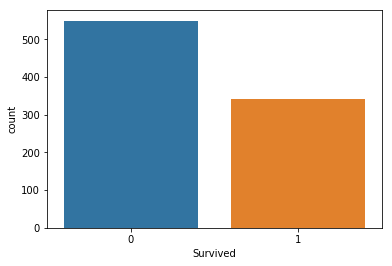

In [113]:
sns.countplot(x="Survived", data=titanic_data)

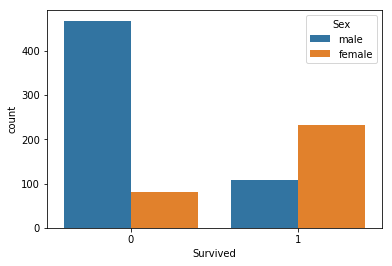

In [114]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

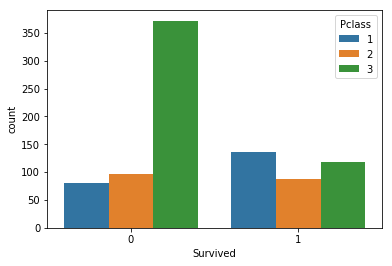

In [115]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

Analysis:

1. Among three classes, relatively more of 3rd class passengers died
2. Among three classes, relatively more of 1st class passengers survived

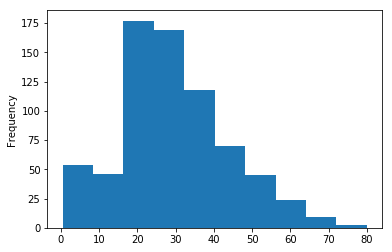

In [116]:
titanic_data["Age"].plot.hist()

Analysis:
    We notice that relatively more middle aged passengers are travelling in Titanic followed by children and the lowest aged passengers.

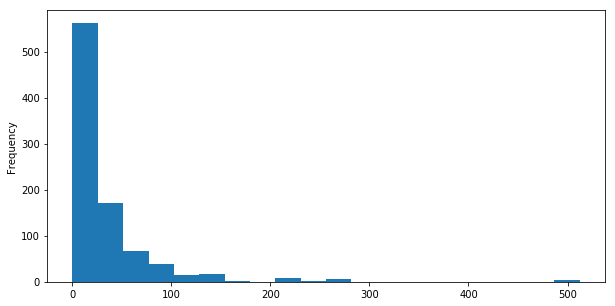

In [117]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

Note:
    Bins are the no. of vertical bars here

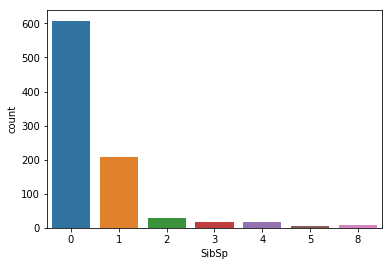

In [118]:
# SibSp stands for Siblings, Spouse indicators
sns.countplot(x="SibSp", data=titanic_data)

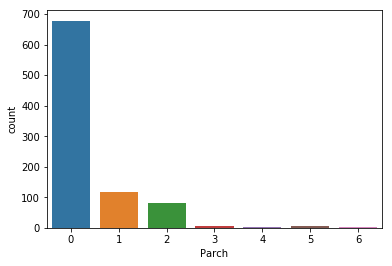

In [119]:
# Parch stands for Parents, Children indicators
sns.countplot(x="Parch", data=titanic_data)

## Data Wrangling

In [120]:
# Data Wrangling (clean Nan and unnecessary values)
# Check if there is any null values False - non-null, True - Nan
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [121]:
# Show the count of NAN values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

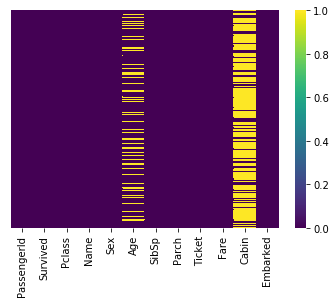

In [122]:
# Pictorially show the NAN values
# Yellow lines indicate NAN values
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

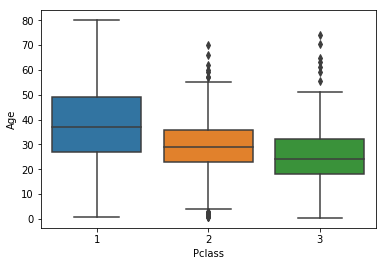

In [123]:
# Examine Ages of passengers over classes
# Notice that 1st class passengers are relatively aged than the other two class passengers
# From this we also notice that the average ages of 1st, 2nd and 3rd class passengers are 37, 29 and 24 respectively

sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [124]:
# Imputation 
def impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if (pd.isnull(Age)):
        if (Pclass == 1):
            return 37
        if (Pclass == 2):
            return 29
        if (Pclass == 3):
            return 24
    else:
        return Age
    
# We replace missing ages of passengers according to their class with the average ages
print(titanic_data["Age"])
titanic_data["Age"] = titanic_data[['Age', 'Pclass']].apply(impute_Age, axis=1)
print(titanic_data["Age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      24.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     29.0
18     31.0
1

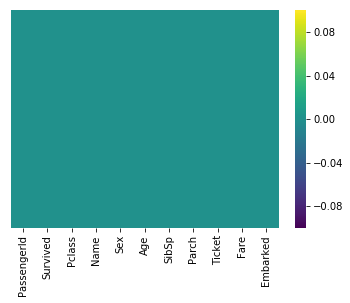

In [125]:
# We can drop the columns (i.e. axis = 1 means columns axis = 0 means rows) which have null values; 
# if we don't want to include those columns for analysis
titanic_data.drop("Cabin", axis=1, inplace=True)

# We can drop all the null rows
titanic_data.dropna(inplace=True)

# Pictorially ascertain if the null values are removed
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

In [126]:
# Show the count of NAN values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [127]:
# Convert column "Sex" having string literals viz., male, female to numbers
# Note: get_dummies(titanic_data['Sex']) splits its column into two columns viz., female and male
#       But only one column is sufficient to represent so we remove the first column by mentioning drop_first=True
#       So, now the column "Sex" will have values viz., 0 for female and 1 for male
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True) 
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [128]:
# Convert column "Embarked" also with dummies as we did for column "Sex"
# Note: Even if we remove one of the columns viz., C from C, Q, S of "Embarked" when Q and S are both 0s implies C = 1
embark = pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [129]:
# Similar to the above we can convert column "Pclass"
# Note: Even if we remove one of the columns viz., 1 from 1, 2, 3 of "Pclass" 
#       when 2nd class and 3rd class are both 0s implies 1st class = 1
Pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [130]:
# Add the new columns that we've transformed
titanic_data = pd.concat([titanic_data, sex, embark, Pcl], axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [131]:
# Drop the old columns which we've transformed and the Id, Name, Ticket columns which we don't use for analysis
titanic_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data

In [133]:
# Consider all columns except Survived as input
X = titanic_data.drop(['Survived'], axis=1)

# Consider Survived as output
y = titanic_data['Survived']

In [149]:
from sklearn.model_selection import train_test_split
# test_size = 0.3 means 30%, random_state = 1 means use the same random sample every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [145]:
# Calculate Classification Report
from sklearn.metrics import classification_report

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.88       166\n           1       0.80      0.77      0.79       101\n\n   micro avg       0.84      0.84      0.84       267\n   macro avg       0.83      0.83      0.83       267\nweighted avg       0.84      0.84      0.84       267\n'

In [148]:
# To Calculate accuracy we need to get the Confusion matrix
# confusion_matrix method gives the output as shown below:
#                 Predicted No        Predicted Yes
# Actual No           a                     b
# Actual Yes          c                     d

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[147,  19],
       [ 23,  78]], dtype=int64)

In [147]:
# Use confusion matrix values to calculate the accuracy
# accuracy score = (a + d) / (a + b + c + d) = (147+78)/(147+19+23+78) = 225 / 267 = 0.8426966292134831)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8426966292134831